# Script for testing methods to detect sound responsive areas in xcranial qcam data

# within experiment

In [1]:
import glob
import os
# path for single animal
dPath = "/media/DATA/MAK/GRISZ_02/AA0001"
qFiles = glob.glob(os.path.join(dPath,'*.qcamraw'))
qFiles

['/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0015.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0036.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0037.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0038.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0048.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0049.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0050.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0051.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0052.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0053.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0054.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0064.qcamraw

## explore single trial / acquisition

In [2]:
import os
import lib.fileIngest as fileIngest
import lib.signalProcess as signalProcess

file = qFiles[10]
print(file)
frameRate = 20

# example for one qcam fileß
filepath = os.path.join(dPath,file)
img,header = fileIngest.extract_qcamraw(filepath)
print(img.shape)
t = signalProcess.getTimeVec(img.shape[2],zeroStart=False)

/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0049.qcamraw
(130, 174, 200)


In [3]:
header

{'Encoding_Version': '0.10',
 'Fixed_Header_Size': '512',
 'ROI': '0, 0, 174, 130',
 'Frame_Size': '45240',
 'Image_Encoding': 'raw16',
 'Image_Format': 'Mono16',
 'Bytes_Per_Pixel': '2',
 'Temporal_Averaging': '1',
 'Exposure': '38000000',
 'Spatial_Binning': '4x4',
 'High_Sensitivity_Mode': 'Off',
 'Normalized_Gain': '1000000',
 'Absolute_Offset': '0',
 'File_Init_Timestamp': '11-18-2024_14:39:36',
 'Header_Creation_Timestamp': '11-18-2024_1',
 'User_Timing_Data': '',
 'User_Defined_Header': ''}

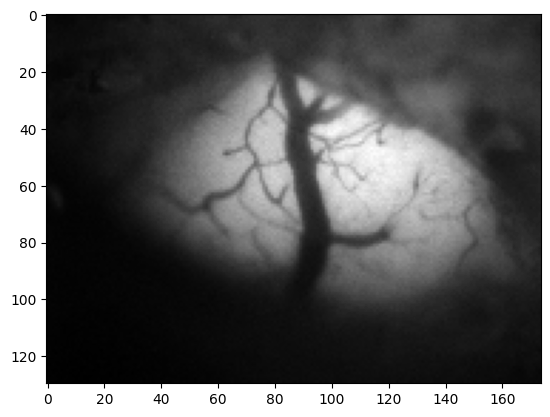

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img[:,:,0],cmap='gray')

In [5]:
# FR not adjustable
# import plotly.express as px
# fig = px.imshow(
#     img, 
#     animation_frame=2,
# )
# fig.show()

In [6]:
# # video in notebook
# %matplotlib inline
# from matplotlib import pyplot as plt
# from matplotlib import animation
# from IPython.display import HTML

# # frame rate
# fr = 20
# interval = int(1/fr*1000) #ms

# # Create a figure and axes
# fig, ax = plt.subplots()

# # Initialize an image object
# im = ax.imshow(img[:,:,0])
# plt.close()

# # def init():
# #     im.set_data(img[:,:,0])
# # Define the update function for the animation
# def update(frame):
#     im.set_data(img[:,:,frame])
#     return im,

# # Create the animation object
# ani = animation.FuncAnimation(fig, update, frames=range(img.shape[2]), interval=interval, blit=True)

# # Show the animation
# # plt.show()
# HTML(ani.to_html5_video())

(<Figure size 640x480 with 3 Axes>,
 array([<Axes: title={'center': 'raw trace with least-sq reg. fit'}>,
        <Axes: title={'center': 'trace minus fit'}>,
        <Axes: title={'center': 'filtered trace minus fit'}>], dtype=object))

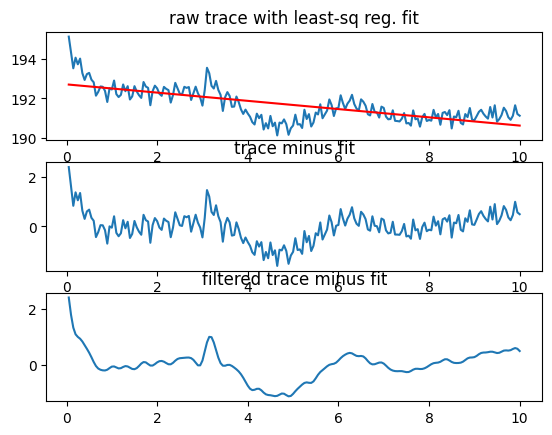

In [7]:
from lib.plotting import plotTraceAvgImg

plotTraceAvgImg(t,img,cutoff_freq=3)

Text(0.5, 1.0, '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0049.qcamraw')

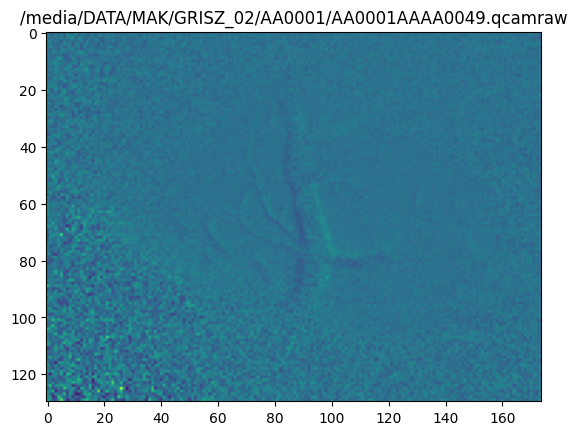

In [8]:
from lib.imgProcess import calcSpatialDFFresp

plt.imshow(calcSpatialDFFresp(img, stimlen=0.1, temporalAvgFrameSpan=10))
plt.title(filepath)

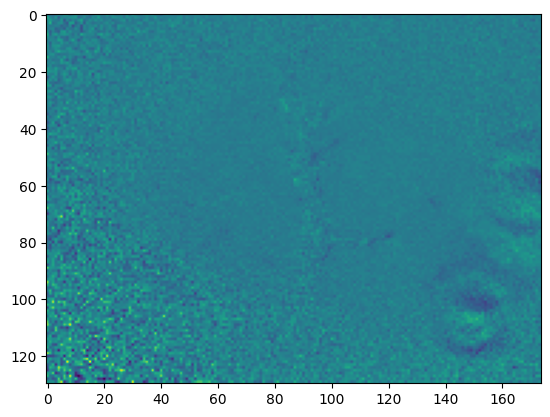

In [9]:
import numpy as np
from lib.signalProcess import butterFilter

t_baseline=(2,3)
t_spatialAvg=(4,8)
# Reshape to 2D: (number of pixels, time points)
reshaped_data = img.reshape(-1,200)
baselineIDX = np.where((t>=t_baseline[0]) & (t<=t_baseline[1]))[0]
spatialbase = reshaped_data[:,baselineIDX].mean(axis=1).reshape(-1,1)
spatialDFF = (reshaped_data-spatialbase)/spatialbase

cutoff = 0.5
spatialDFF = butterFilter(spatialDFF,cutoff_freq=cutoff)

spatialDFFresp = spatialDFF[:,np.where((t>=t_spatialAvg[0]) &
                                    (t<=t_spatialAvg[1]))[0]]\
                                        .mean(axis=1).reshape(*img.shape[:2])
plt.imshow(spatialDFFresp)

## average raw fluorescence across trials

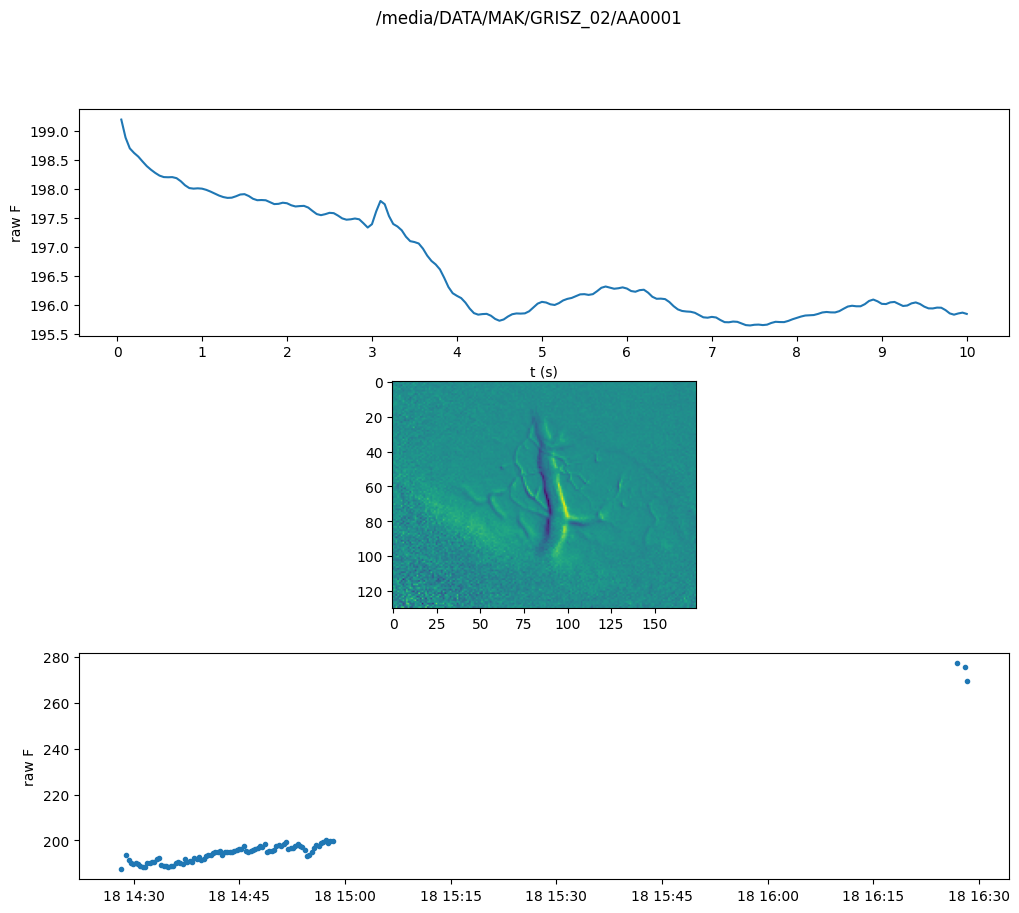

In [10]:
from lib.plotting import experimentAvgPlot

experimentAvgPlot(dPath, qFiles)

# explore blood vessel edge capture

In [11]:
# run getEdgeROI.py for edge mask
import joblib
import glob

maskFiles = glob.glob(os.path.join(dPath,'*_mask.joblib'))
maskFiles

['/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0015_mask.joblib',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035_mask.joblib']

In [12]:
maskFile = maskFiles[0]
mask = joblib.load(maskFile.replace('.qcamraw','_mask.joblib'))
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(130, 174))

In [13]:
from lib.fileIngest import qcams2imgs
from lib.imgProcess import getImgEdges
imgs = qcams2imgs(qFiles)[0]
allEdges = []
for imgSeries in imgs:
    for frame in np.arange(imgSeries.shape[2]):        
        edge = getImgEdges(imgSeries[:,:,frame])
        allEdges.append(edge)

In [14]:
np.array(allEdges).shape

(18600, 130, 174)

In [15]:
len(allEdges)

18600

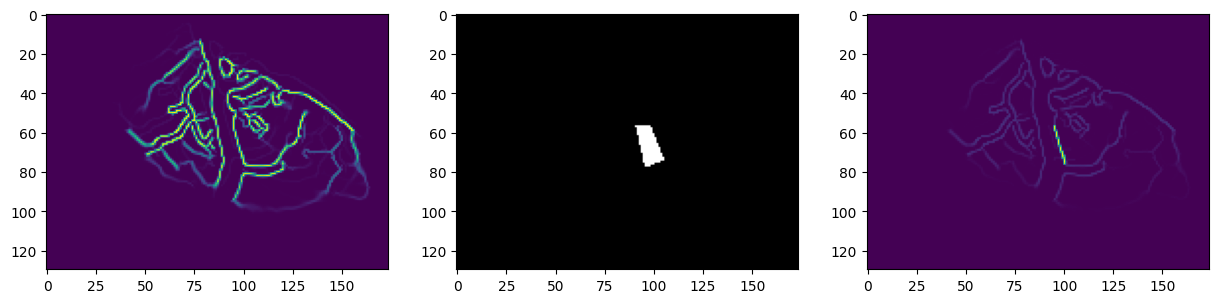

In [18]:
# more consistently found edges will be brighter
fig,ax = plt.subplots(1,3,figsize=(15,6))
ax[0].imshow(np.array(allEdges).mean(axis=(0)))
ax[1].imshow(mask,cmap='gray')
ax[2].imshow(((mask*1)+0.15)*np.array(allEdges).mean(axis=(0)))